<a href="https://colab.research.google.com/github/noobprogrammer-vav/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Processing

In [3]:
df = pd.read_csv("heart.csv")

In [7]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [8]:
df.shape

(1025, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
#missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

Data Visualisation

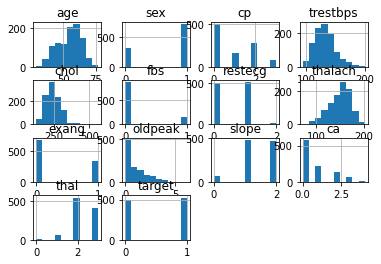

In [28]:
df.hist()
plt.show()

the above graphs show us that "oldpeak" has exponential distribution.
"age,trestbps,chol,thalach" have gaussian distributions.

<ipython-input-34-f782337da26d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)
<ipython-input-34-f782337da26d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names)


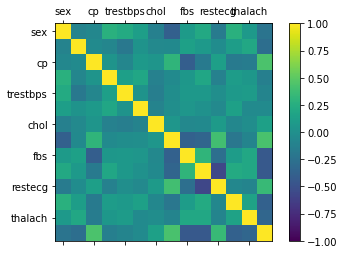

In [34]:
#Correlation plots
names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
correlations = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

The above output shows us that each variable is positively correlated with eachother.

Splitting Features from Target

In [14]:
x = df.drop(columns='target',axis=1)
y = df['target']
print(x)
print(y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

Splitting Test and Train Sets

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,stratify=y, random_state = 2)
print(x.shape, x_train.shape, x_test.shape)

(1025, 13) (820, 13) (205, 13)


Training

In [17]:
model = LogisticRegression()
#training model with training data
model.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

In [18]:
#accuracy score for taining data
x_train_prediction = model.predict(x_train)
training_data_accu = accuracy_score(x_train_prediction,y_train)
print(training_data_accu)

0.8524390243902439


In [19]:
#accuracy score for test data
x_test_prediction = model.predict(x_test)
test_data_accu = accuracy_score(x_test_prediction,y_test)
print(test_data_accu)

0.8048780487804879


Predictive system

In [23]:
'''sample data for testing
71,0,0,112,149,0,1,125,0,1.6,1,0,2 Target = 1
43,0,0,132,341,1,0,136,1,3,1,0,3 Target = 0
34,0,1,118,210,0,1,192,0,0.7,2,0,2 Target = 1
51,1,0,140,298,0,1,122,1,4.2,1,3,3 Target = 0
52,1,0,128,204,1,1,156,1,1,1,0,0 Target = 0
34,0,1,118,210,0,1,192,0,0.7,2,0,2 Target = 1
'''
input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2) #this data has an output value of 0 in the dataset
#reshaping as numpy array 
np_array = np.asarray(input_data)

reshape_data = np_array.reshape(1,-1)
predicted = model.predict(reshape_data)
print(predicted)


[1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [26]:
result = predicted[0]
if result == 0:
  print('No heart disease detected')
else:
  print("Very sorry to say that 'This person has Heart disease!'.")

Very sorry to say that 'This person has Heart disease!'.
